<a href="https://colab.research.google.com/github/fabnancyuhp/DEEP-LEARNING/blob/main/NOTEBOOKS/REGRESSION_ANNs_on_Structured_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality Regression

Here we handle a regression problem on Red wine Quality dataset. We import the data from github. We convert all columns in float32 because it makes the dataset more TensorFlow digestible. 

In [4]:
import pandas as pd
winequality = pd.read_csv("https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/winequality-red.csv").astype('float32')
winequality.head(3) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0


We want to predict the wine quality. Then the quality is the target value. The others columns from the dataset are the values of the features. We also split the dataset into the train set and the test set.

In [5]:
x = winequality.drop(['quality'], axis=1)
y = winequality['quality']

We display the distinct value of winequality['quality']. Although the target values are integers stored in a float format, we'll make a regression model to predict the quality.  The model we'll build we'll return a float number. We'll add an extra step that rounds the outputs of our model.

In [23]:
winequality['quality'].unique()

array([5., 6., 7., 4., 8., 3.], dtype=float32)

We split the dataset into the train set and the test set.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2, random_state=42)

## Building the regression model with tensorflow.keras

We import the keras.layers and keras.models packages:

In [7]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer 
from tensorflow.keras.models import Sequential

Now, we are building the neural network and compile the model. You have to notice we import the Adam optimizer to choose the learning rate. The output Dense layer has one unit in the case of a regression problem. We compile the model with the mean absolute error loss and mean absolute error metric.

In [14]:
from tensorflow.keras.optimizers import Adam

model = Sequential([InputLayer(input_shape=(x.shape[1],))
                    ,BatchNormalization()
                    ,Dense(100,activation='relu')
                    ,Dropout(0.3)
                    ,Dense(100,activation='relu')
                    ,Dropout(0.3)
                    ,BatchNormalization()
                    ,Dense(100, activation='relu')
                    ,Dropout(0.3)
                    ,Dense(12,activation='relu')
                    ,Dropout(0.1)
                    ,Dense(1)])

model.compile(optimizer=Adam(learning_rate=0.001),loss='mae',metrics=['mae'])

## Training and evaluating the model

Now, we launch the training stage with 700 epochs. The number of epochs is defining how much time the whole training set will be passed through the network. We use 10 percent of the training as a validation set.

In [15]:
history = model.fit(x_train, y_train, epochs=700, verbose=0,validation_split=0.1)

We evaluate the model on the test set:

In [16]:
model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4556 - mae: 0.4556


[0.45556050539016724, 0.45556050539016724]

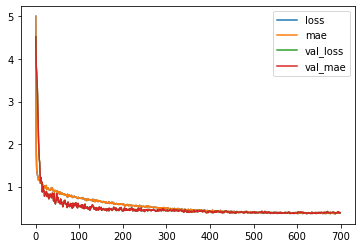

In [17]:
pd.DataFrame(history.history).plot()

## Making predictions with the model
Here, we predict the quality of a new wine from the test set. We reshape to make the vector suitable for the model. You notice we round the predicted value to compare it with the true value.

In [21]:
import numpy as np
new_wine = x_test[15]
new_wine_reshape = x_test[15].reshape(1,11)
pred_model = model.predict(new_wine_reshape)
pred_model_bis = np.round(pred_model[0])
print("Predicted value :"+str(pred_model_bis))
print("The true value :"+str(y_test[15]))

Predicted value :[7.]
The true value :7.0


# Exercise :Superconductor Regression 
We want to predict critical_temp from the other variable. First, you have the run the cell below to import and view the head of the dataset.

In [ ]:
import requests, io, zipfile
import numpy as np
import matplotlib.pyplot as plt
filename = "train.csv"
#Remove "blob",  Replace github.com by raw.githubusercontent.com
url = "https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/superconduct.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
#z.extractall()
import pandas as pd
#df = pd.read_csv(filename, sep=',')
#df.head(3)
dfbis = pd.read_csv(z.open('train.csv'), sep=',')
dfbis.head(3)

Here, we define the target and the features. You have the run the cell below.

In [ ]:
X = dfbis.drop(['critical_temp'],axis=1)
Y = dfbis['critical_temp']

1) Split the dataset into a training set and a test set using train_test_split.


2) Make a neural network, compile it and fit it with TensorFlow.keras to solve this regression problem. 
You have to respect the following architecture: 
* BatchNormalization layer following the input of the network, 
* 3 hidden Dense layers.
* You have to put a Dropout layer with rate 0.1 between the first Dense hidden layer and the second one. 
* You have to put a Dropout layer with rate 0.1 between the second hidden layer and the last one.

You have to train your model with 500 epochs, set verbose=0, and set the batch_size = 10.

3) Ev

3) How many trainable parameters does your neural network have? Does a BatchNormalization layer yield trainable parameters.

In [ ]:
#1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#2)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.models import Sequential

modelreg = Sequential()
modelreg.add(InputLayer(input_shape=(X.shape[1],)))
modelreg.add(BatchNormalization())
modelreg.add(Dense(10,activation='relu'))
modelreg.add(Dropout(0.1))
modelreg.add(Dense(10,activation='relu'))
modelreg.add(Dropout(0.1))
modelreg.add(Dense(10,activation='relu'))
modelreg.add(Dense(1))

modelreg.compile(optimizer='adam',loss='mae',metrics='mae')

#we train modelreg
modelreg.fit(X_train,y_train,epochs=500,batch_size=10,verbose=0)

In [ ]:
modelreg.evaluate(X_test,y_test)

# Work hour prediction

In [17]:
import requests, io, zipfile
import numpy as np
import matplotlib.pyplot as plt
filename = "train.csv"
#Remove "blob",  Replace github.com by raw.githubusercontent.com
#url = "https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/superconduct.zip"
url = "https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/Participants_Data_HPW_1.zip"
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
#z.extractall()
import pandas as pd
#df = pd.read_csv(filename, sep=',')
#df.head(3)
dfbis = pd.read_csv(z.open('train.csv'), sep=',')
dfbis.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Private,98926,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,-3,0,44,United-States,<=50K
1,76,Self-emp-not-inc,132607,Bachelors,12,Married-civ-spouse,Sales,Husband,White,Male,7527,0,44,United-States,>50K
2,40,Private,243258,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,19,0,57,United-States,>50K


In [19]:
dfbis['workclass'].unique()

array([' Private', ' Self-emp-not-inc', ' State-gov', ' Self-emp-inc',
       ' Federal-gov', ' Local-gov', ' Never-worked', ' Without-pay'],
      dtype=object)

In [20]:
dfbis['education'].unique()

array([' HS-grad', ' Bachelors', ' Masters', ' Some-college', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' Assoc-voc', ' Assoc-acdm',
       ' 5th-6th', ' 11th', ' 9th', ' 1st-4th', ' 12th', ' 10th',
       ' Preschool'], dtype=object)

In [21]:
dfbis['occupation'].unique()

array([' Other-service', ' Sales', ' Transport-moving', ' Prof-specialty',
       ' Exec-managerial', ' Adm-clerical', ' Handlers-cleaners',
       ' Farming-fishing', ' Craft-repair', ' Protective-serv',
       ' Machine-op-inspct', ' Tech-support', ' Priv-house-serv',
       ' Armed-Forces'], dtype=object)